In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.pyplot import Line2D
from matplotlib.patches import Patch, Rectangle
import itertools
# mpl.rcParams['font.family'] = 'Liberation Sans'

In [2]:
# global graph parameters
plt.rc('axes', axisbelow=True, titlelocation='left')
plt.rc('xtick', bottom=False)
plt.rc('ytick', left=False)
plt.rc('grid', color='lightgrey', linewidth=1)
plt.rc('legend', frameon=False)
plt.rc('savefig', dpi=300, bbox="tight", transparent=True)
plt.rc('figure', dpi=300)
plt.rc('font', family='Arial')
plt.rc('text', usetex=False)

### select start stand age & forest type

In [3]:
# stand_age = 47
stand_age = 37.5

In [4]:
forest_type = 'tropical_humid'
forest_type_full = 'Planted (tropical humid) broadleaf forest excl. Euc/Teak'

In [5]:
sample_design = 'SRS'

### farm

#### read in data

In [7]:
data = pd.read_csv('../results/C_'+sample_design+'estimate_95ci_loMiUpGrowthFunc_start'+str(stand_age).replace('.', '-')+'_'+forest_type+'.csv')

In [8]:
data.columns = ['index', 'year', 'C', 'C_up', 'C_lo', 'upC', 'upC_up', 'upC_lo', 'loC', 'loC_up', 'loC_lo']

In [9]:
data.head(2)

,index,year,C,C_up,C_lo,upC,upC_up,upC_lo,loC,loC_up,loC_lo
0,carbon2017TropHum,2017,2157.781266,1679.463814,2636.098719,2779.893689,2177.874283,3381.913094,1376.548471,1062.416019,1690.680923
1,carbon2018TropHum,2018,2219.998840,1745.002629,2694.995051,2886.013757,2290.211797,3481.815717,1389.787492,1077.152262,1702.422722


#### plot carbon estimates and uncertainties

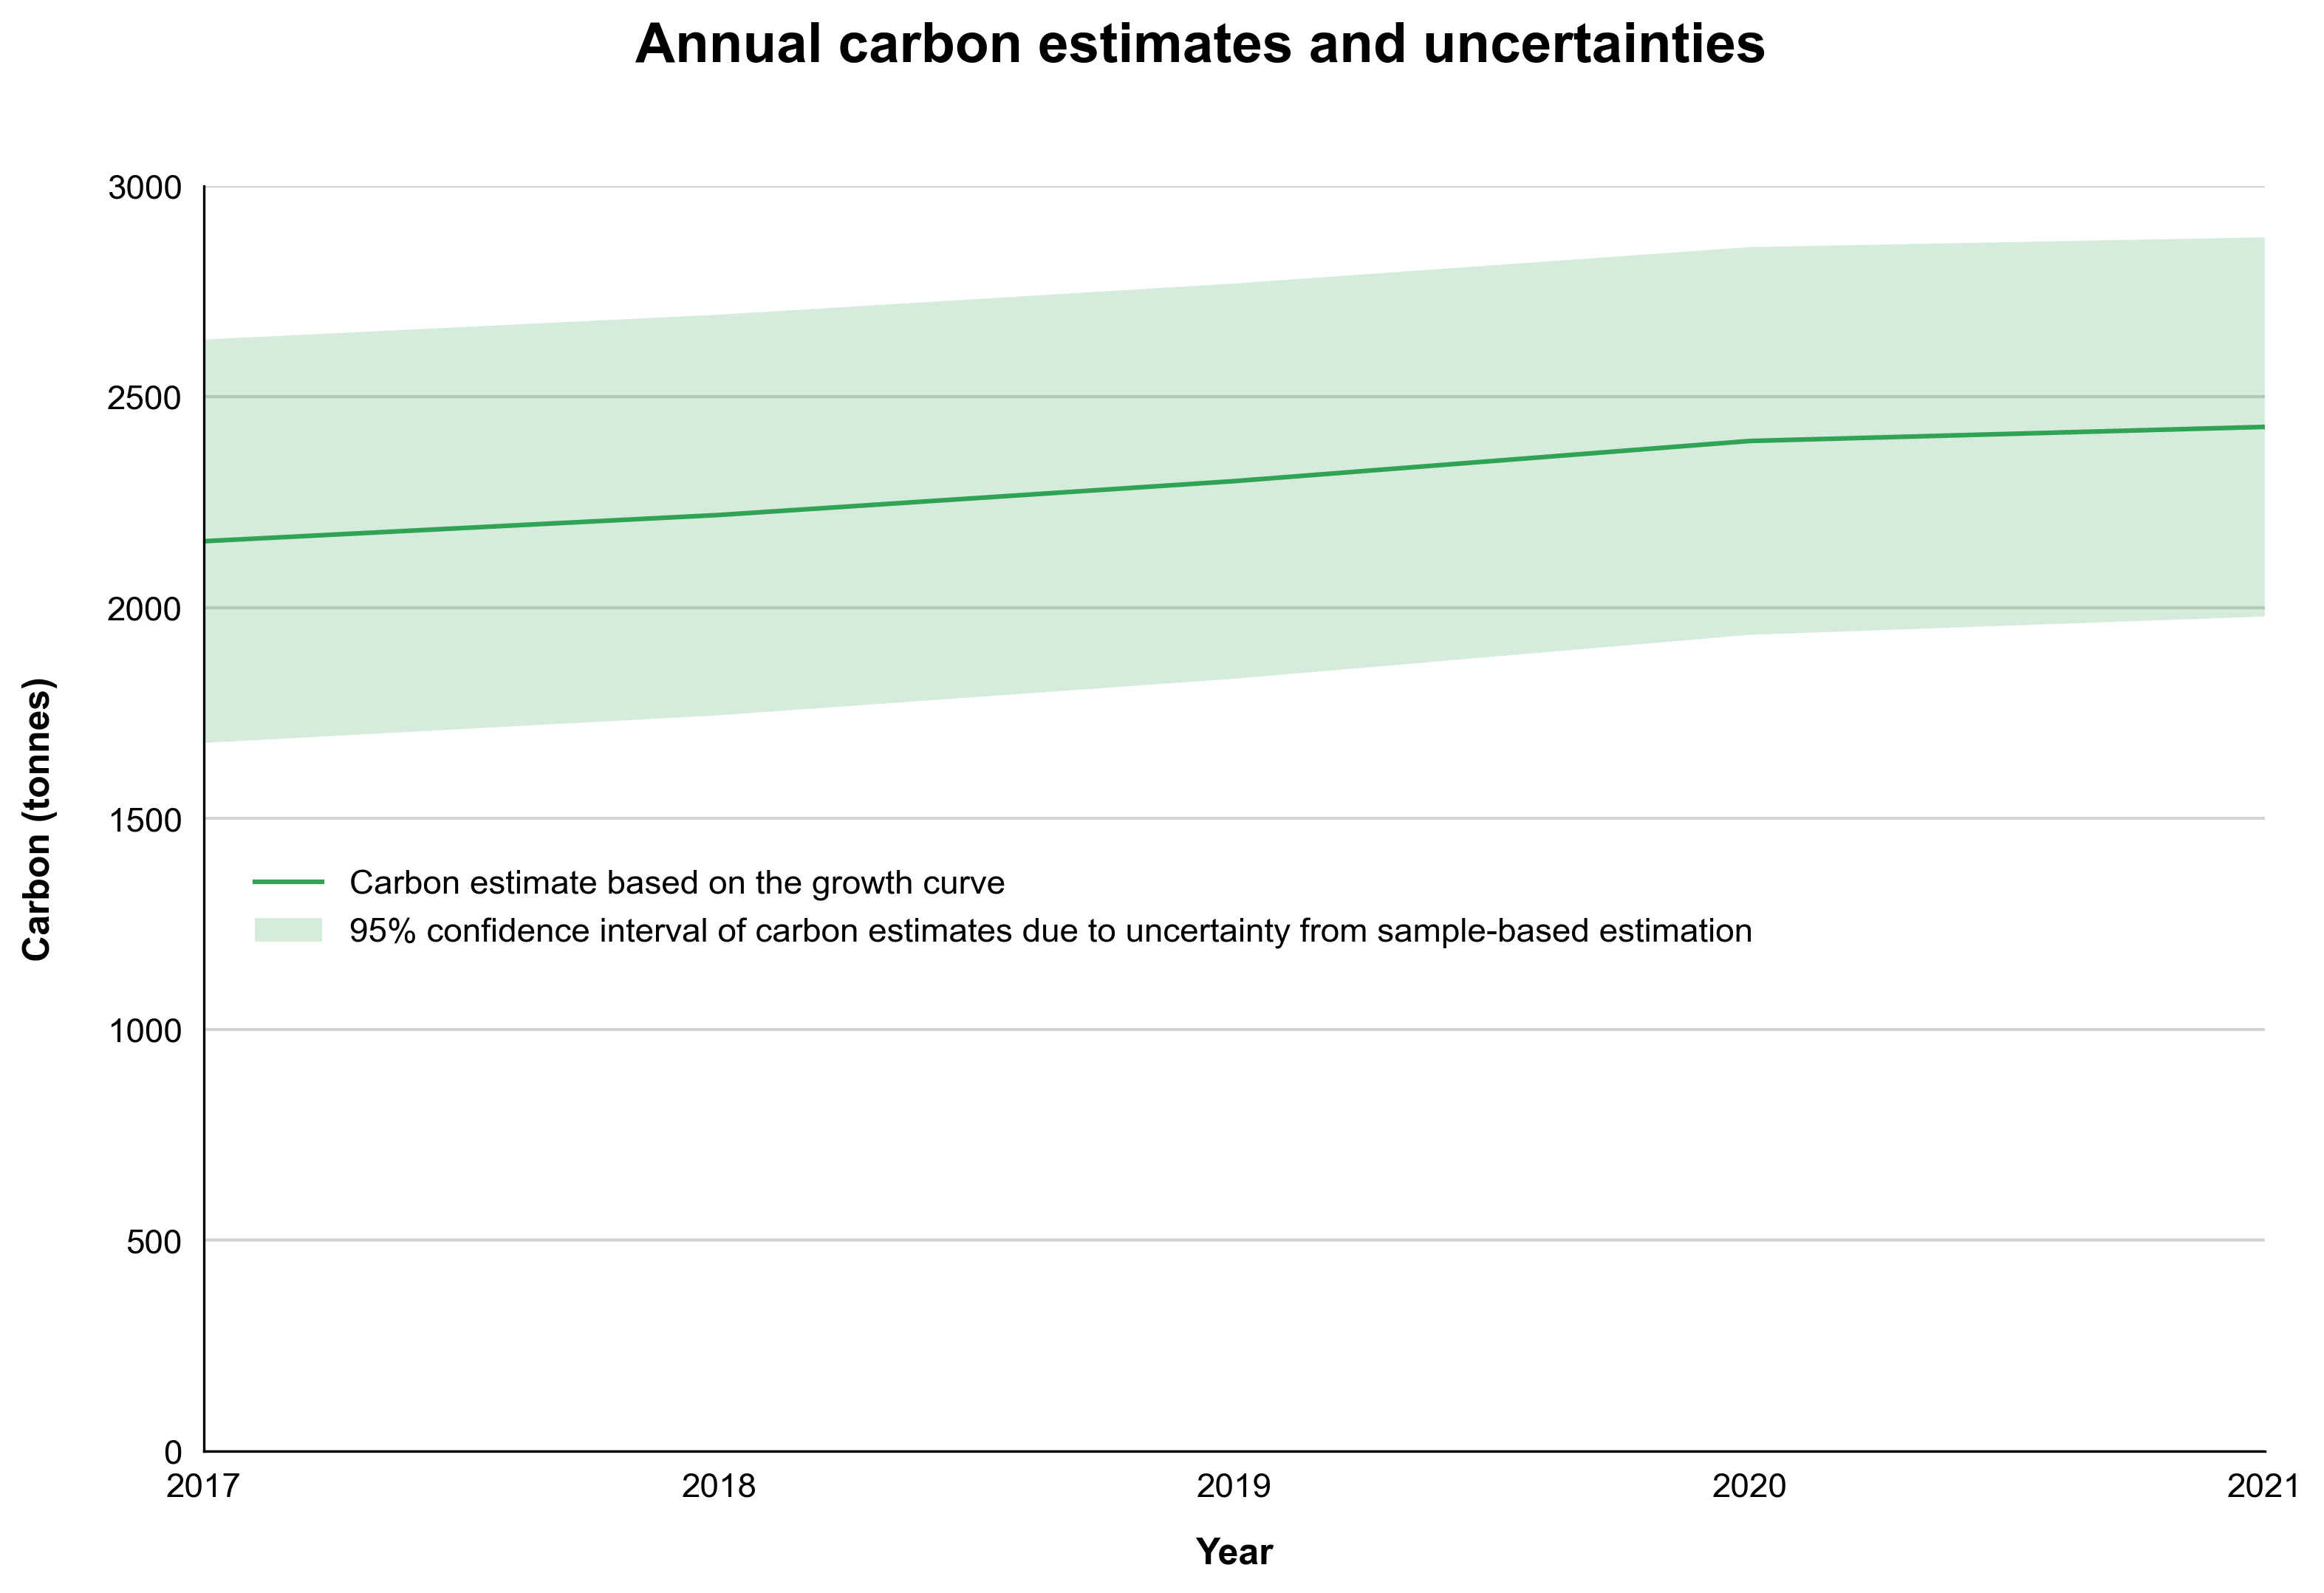

In [10]:
# colors
greens = ['#e5f5e0','#a1d99b','#31a354']  # light 2 dark
yellow2green256 = [list(eval(string[3:])) for string in ['rgb(247,252,185)','rgb(173,221,142)','rgb(49,163,84)']]
yellow2green = [[rgb/256 for rgb in rgb_lst] for rgb_lst in yellow2green256]

# plot
fig, ax = plt.subplots(1, figsize=(12,12*.618), dpi=300)
## estimate
ax.plot(data.year, data.C, color=greens[2], label='Carbon estimate based on the growth curve')
## ci
ax.fill_between(data.year, data.C_lo, data.C_up, 
                alpha=0.2, color=greens[2], edgecolor=None, 
                label='95% confidence interval of carbon estimates due to uncertainty from sample-based estimation')

# ax.plot(data.year, data.upC, color=yellow2green[1], 
#         label='Carbon estimate based on upper and lower confidence bounds of growth curve')
# ax.fill_between(data.year, data.upC_lo, data.upC_up, 
#                 facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
#                 linestyle='--', 
#                 label='95% confidence interval of carbon estimates due to uncertainty from sample-based estimation')

# ax.plot(data.year, data.loC, color=yellow2green[1])
# ax.fill_between(data.year, data.loC_lo, data.loC_up, 
#                 facecolor=yellow2green[1]+[0.2], edgecolor=yellow2green[1]+[1], 
#                 linestyle='--')
# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', color='lightgrey')
ax.set_axisbelow(True)
ax.set_xticks(range(2016,2022,1))
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
ax.set_xlim(2017,2021)
ax.set_ylim(0,3000)
# labels
ax.set_xlabel('Year', labelpad=11, fontsize=12, fontweight='bold')
ax.set_ylabel('Carbon (tonnes)', labelpad=16, fontsize=12, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.5), framealpha=1, 
          fontsize=11, facecolor='white', edgecolor='white', borderpad=1)
plt.suptitle('Annual carbon estimates and uncertainties', fontsize=18, fontweight='bold')
# plt.title(forest_type_full+'; Initial stand age = '+str(stand_age)+' years')
# save figure
plt.savefig('../results/C_'+sample_design+'estimate_ci_start'+str(stand_age).replace('.', '-')+'_'+forest_type+'.png',
           bbox_inches='tight', facecolor='white')

### per site

#### read in data

In [6]:
data = pd.DataFrame()
data_err = pd.DataFrame()
for LU in ['intervention', 'regeneration', 'forest', 'counterfactual', 'other']:
    print(LU)
    data_LU = pd.read_csv('../results/C_'+sample_design+'estimate_95ci_growthFunc_start'+str(stand_age).replace('.', '-')+'_'+LU+'_'+forest_type+'.csv')
    data_LU.columns = ['index', 'year', f'C_{LU}', f'C_lo_{LU}', f'C_up_{LU}']
    data_LU = data_LU.iloc[:, 1:]  # drop index
    data_LU = data_LU.set_index('year')
    
    dat_s = data_LU[f'C_{LU}']
    err_s = dat_s - data_LU[f'C_lo_{LU}']
    data = pd.concat([data, dat_s], axis=1)
    data_err = pd.concat([data_err, err_s], axis=1)

intervention
regeneration
forest
counterfactual
other


#### compute annual difference

In [17]:
data

,C_intervention,C_regeneration,C_forest,C_counterfactual,C_other
2017,0,381.978276,78.960818,99.323686,1720.199069
2018,0,396.584448,84.312562,75.235186,1764.590646
2019,0,416.238355,91.254382,76.395414,1821.201488
2020,0,440.047117,99.460179,52.613116,1887.948183
2021,0,467.049965,108.612821,3.394186,1891.933934


In [34]:
data['C_farm'] = data.C_intervention + data.C_regeneration + \
data.C_forest + data.C_other
data

,C_intervention,C_regeneration,C_forest,C_counterfactual,C_other,C_farm
2017,0,381.978276,78.960818,99.323686,1720.199069,2181.138163
2018,0,396.584448,84.312562,75.235186,1764.590646,2245.487656
2019,0,416.238355,91.254382,76.395414,1821.201488,2328.694225
2020,0,440.047117,99.460179,52.613116,1887.948183,2427.455479
2021,0,467.049965,108.612821,3.394186,1891.933934,2467.596720


In [35]:
data_diff = data.diff()
data_diff

,C_intervention,C_regeneration,C_forest,C_counterfactual,C_other,C_farm
2017,NaN,NaN,NaN,NaN,NaN,NaN
2018,0.0,14.606172,5.351744,-24.088500,44.391576,64.349493
2019,0.0,19.653907,6.941820,1.160228,56.610843,83.206569
2020,0.0,23.808761,8.205797,-23.782299,66.746695,98.761253
2021,0.0,27.002849,9.152642,-49.218930,3.985751,40.141242


In [36]:
farm_col = data_diff.pop('C_farm')
data_diff.insert(0, farm_col.name, farm_col)
data_diff

,C_farm,C_intervention,C_regeneration,C_forest,C_counterfactual,C_other
2017,NaN,NaN,NaN,NaN,NaN,NaN
2018,64.349493,0.0,14.606172,5.351744,-24.088500,44.391576
2019,83.206569,0.0,19.653907,6.941820,1.160228,56.610843
2020,98.761253,0.0,23.808761,8.205797,-23.782299,66.746695
2021,40.141242,0.0,27.002849,9.152642,-49.218930,3.985751


#### prep plot

In [12]:
data = data.T
data

,2017,2018,2019,2020,2021
C_intervention,0.000000,0.000000,0.000000,0.000000,0.000000
C_regeneration,381.978276,396.584448,416.238355,440.047117,467.049965
C_forest,78.960818,84.312562,91.254382,99.460179,108.612821
C_counterfactual,99.323686,75.235186,76.395414,52.613116,3.394186
C_other,1720.199069,1764.590646,1821.201488,1887.948183,1891.933934


In [13]:
data_err = data_err.T
data_err

,2017,2018,2019,2020,2021
0,0.000000,0.000000,0.000000,0.000000,0.000000
0,244.528312,242.073463,237.546733,231.277431,223.624527
0,130.674433,128.858437,125.998076,122.286513,117.914352
0,56.196633,52.896964,53.060426,46.405002,3.136010
0,399.765041,396.639877,390.772988,382.639100,375.100189


#### plot carbon estimates and uncertainties

In [14]:
fig_width = 7.2
fig_height = 4.45

In [15]:
grp_width = 0.66  # how filled with data each group is among its full width
bar_width_in_grp = grp_width * 0.9  # perc. data space filled w/ bars, w/in grp
fontsize_on_axis = 7
fontweight_barlabel = 'bold'
fontsize_off_axis = 8  # legend, axis label
lw_bar_edge = 1.5  # linewidth of bar edge

In [16]:
def normalize_rgb(rgb_lst):
    return [rgb/255 for rgb in rgb_lst]

In [17]:
colors = [f'#{hx}' for hx in ['cbd328', '8ec33e', 'f7d22c', 'f98b2e', '3a583e']]
grey_dark = normalize_rgb([116,114,114])

In [18]:
def show_spine(ax, visible_spine_lst):
    '''border line(s) to show on ax'''
    for position in ['top','bottom','left','right']:
        if position not in visible_spine_lst:
            ax.spines[position].set_visible(False)

In [19]:
def flip(items, ncol):
    '''rearrange elements of ITEMS so that when arranging the elements
    into NCOL columns by column, the result is the same as arranging
    the original ITEMS by row'''
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

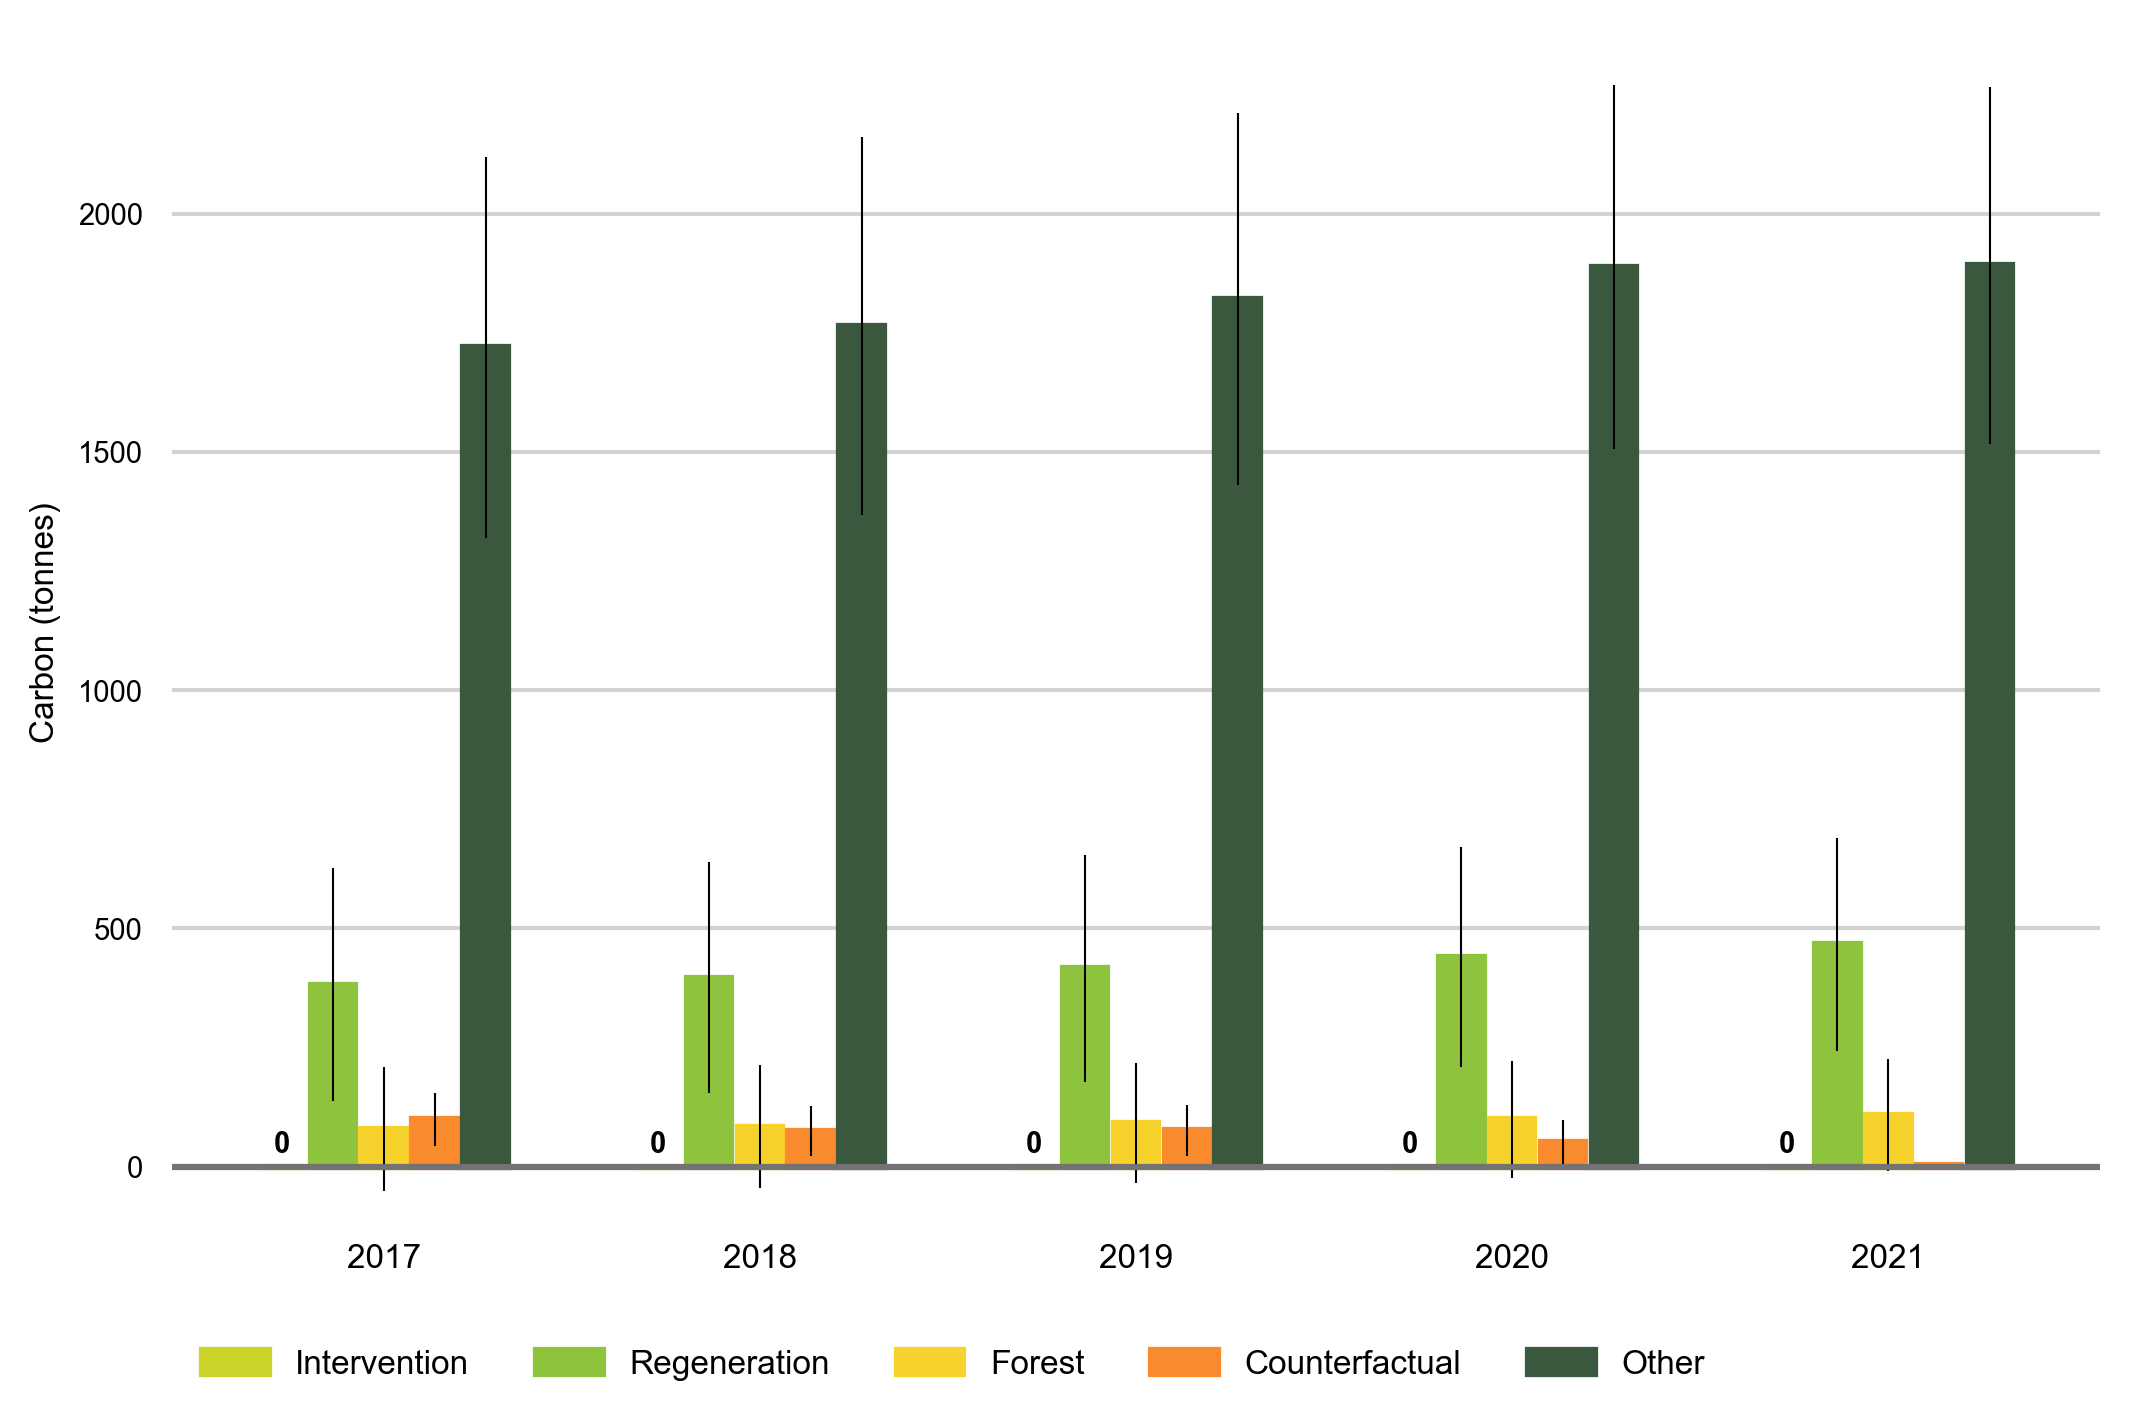

In [22]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
n_grp = 5  # number of groups (time periods)
n_bar_per_grp = data.shape[0]  # number of land use/site types
# calculate bar width and location of bar center
n_gap_per_grp = n_bar_per_grp - 1
gap_width = (grp_width - bar_width_in_grp) / n_gap_per_grp
bar_width = bar_width_in_grp / n_bar_per_grp
delta = gap_width + bar_width

x_mid_coords = np.arange(n_grp)  # x axis label location, center of grp of bars
n_bar_one_side = n_bar_per_grp / 2
multipliers = np.arange(-n_bar_one_side, n_bar_one_side) + 0.5
x_coord_deltas = [delta*mul for mul in multipliers]  # shift bar center for each bar in grp

for i in range(n_bar_per_grp):
    x_coord_delta = x_coord_deltas[i]
    # graph bars
    color = colors[i]
    bars = ax.bar(x=x_mid_coords + x_coord_delta,
                  height=data.iloc[i, :],
                  width=bar_width,
                  color=color, edgecolor=color, linewidth=lw_bar_edge,
                  label=data.index[i][2:].title())
    if i == 0:  # site type = intervention
        bar_labels = data.iloc[i, :].map(lambda a: str(int(a)))
        ax.bar_label(bars, labels=bar_labels, 
                     fontsize=fontsize_on_axis, fontweight=fontweight_barlabel, padding=2)
    ax.errorbar(x=x_mid_coords + x_coord_delta,
                y=data.iloc[i, :], 
                yerr=data_err.iloc[i, :], 
                fmt='none', ecolor='k', elinewidth=0.5)

# label
ax.set_xticks(x_mid_coords)
ax.set_xticklabels(data.columns,
                   fontsize=fontsize_off_axis)
ax.yaxis.set_tick_params(labelsize=fontsize_on_axis)
ax.set_ylabel('Carbon (tonnes)', fontsize=fontsize_off_axis)
# ax.set_title('Mangrove gain and loss, by decade and region, 2000-2020')
# aesthetics
show_spine(ax, [])
ax.grid(axis='y')
ax.axhline(color=grey_dark)
ax.set_ylim(-100)
fig.tight_layout()
# legend
handles, labels = ax.get_legend_handles_labels()
ncol_legend = 5
fig.legend(flip(handles, ncol_legend), flip(labels, ncol_legend),
           ncol=ncol_legend,
           loc='upper left', bbox_to_anchor=(ax.get_position().x0, 0),
           fontsize=fontsize_off_axis, frameon=False)
# save and plot
plt.savefig('../results/C_'+sample_design+'estimate_ci_start'+str(stand_age).replace('.', '-')+'_'+'perSite'+'_'+forest_type+'.png',
           bbox_inches='tight', facecolor='white')
plt.show()